# Imports

In [30]:
# Data Manipulation
import numpy as np
import pandas as pd

# Spliting Data
from sklearn.model_selection import train_test_split

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine Learning Model
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Dimentionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Model Evaluation
from sklearn.metrics import accuracy_score

# Load the Data

In [4]:
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

df_wine = pd.read_csv(file, header=None)

In [5]:
df_wine.columns = ['Class label', 'Alcohol',
... 'Malic acid', 'Ash',
... 'Alcalinity of ash', 'Magnesium',
... 'Total phenols', 'Flavanoids',
... 'Nonflavanoid phenols',
... 'Proanthocyanins',
... 'Color intensity', 'Hue',
... 'OD280/OD315 of diluted wines',
... 'Proline']

In [6]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
df_wine['Class label'].unique()

array([1, 2, 3], dtype=int64)

# Data Preprocessing

# Split the Data

In [8]:
X = df_wine.drop('Class label', axis=1)
y = df_wine['Class label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
#  NumPy's bincount() function, which counts the number of occurrences of each value in an array
print("Labels count in y ", np.bincount(y))
print("Labels count in y ", np.bincount(y_train))
print("Labels count in y ", np.bincount(y_test))

Labels count in y  [ 0 59 71 48]
Labels count in y  [ 0 41 50 33]
Labels count in y  [ 0 18 21 15]


### Standardizing

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


### Feature Selection

### Feature Extraction
- Principal component analysis (PCA)
- Linear discriminant analysis (LDA)
- kernel principal component analysis (KPCA)

#### PCA 

In [17]:
pca = PCA(n_components=2)

In [18]:
# Dimentionality Reduction
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [26]:
# To explain the variance
pcav = PCA()

In [28]:
X_train_pcav = pcav.fit_transform(X_train_std)

In [29]:
pcav.explained_variance_ratio_

array([0.35730453, 0.19209164, 0.11006755, 0.07250719, 0.06973166,
       0.05341402, 0.04555029, 0.0241568 , 0.02040417, 0.01976974,
       0.01685307, 0.01086639, 0.00728295])

#### LDA

In [31]:
lda = LDA(n_components=2)

In [33]:
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [37]:
X_test_lda = lda.transform(X_test_std)

In [40]:
# Note: The scikit-learn library also implements advanced techniques for nonlinear dimensionality
# http://scikit-learn.org/stable/modules/manifold.html

# Training the Model

In [19]:
ppn = Perceptron(eta0=0.1, random_state=23)
lr = LogisticRegression(C=100, random_state=23, solver='lbfgs', multi_class='multinomial')

In [70]:
svm = SVC(kernel='linear', random_state=23)

In [76]:
svm1 = SVC(C=1.0, kernel='rbf', gamma=20, random_state=23)

In [91]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=23)

In [97]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, n_jobs=2, random_state=23)

In [103]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [57]:
ppn.fit(X_train_std,y_train)

C:\Users\Maddy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=23, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=23, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=23,
  shrinking=True, tol=0.001, verbose=False)

In [77]:
svm1.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
  max_iter=-1, probability=False, random_state=23, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=23,
            splitter='best')

In [98]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [104]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=23, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
lr.fit(X_train_lda, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=23, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

# Predictions

In [41]:
y_pred = ppn.predict(X_test_std)

In [65]:
y_pred_lr = lr.predict(X_test_std)

In [66]:
lr.predict_proba(X_test_std[:3,:])

array([[2.33334134e-12, 2.15946157e-04, 9.99784054e-01],
       [1.95270355e-05, 9.79747449e-01, 2.02330237e-02],
       [2.09831585e-06, 6.89955423e-01, 3.10042479e-01]])

In [73]:
y_pred_svm = svm.predict(X_test_std)

In [78]:
y_pred_svm1 = svm1.predict(X_test_std)

In [93]:
y_pred_tree_model = tree_model.predict(X_test_std)

In [99]:
y_pred_forest = forest.predict(X_test_std)

In [105]:
y_pred_knn = knn.predict(X_test_std)

# Model Evaluation

In [49]:
misclassified_examples = (y_test != y_pred).sum()
total_examples = len(y_test)
classification_error = misclassified_examples/total_examples
classification_accuracy = 1 - classification_error
print("Misclassified exmaples:", misclassified_examples)
print("Classification error:", classification_error)
print("Classification accuracy", classification_accuracy)

Misclassified exmaples: 17
Classification error: 0.37777777777777777
Classification accuracy 0.6222222222222222


In [46]:
print("Classification accuracy:", accuracy_score(y_test, y_pred))

Classification accuracy: 0.6222222222222222


In [67]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_lr))

Classification accuracy: 0.9333333333333333


In [74]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_svm))

Classification accuracy: 0.9111111111111111


In [79]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_svm1))

Classification accuracy: 0.9333333333333333


In [94]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_tree_model))

Classification accuracy: 0.9333333333333333


In [100]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_forest))

Classification accuracy: 0.9777777777777777


In [106]:
print("Classification accuracy:", accuracy_score(y_test, y_pred_knn))

Classification accuracy: 0.9111111111111111


# Visualization

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

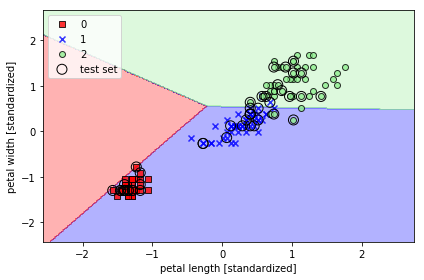

In [54]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

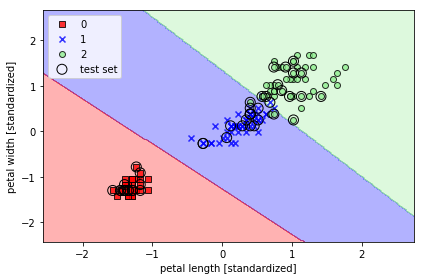

In [68]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

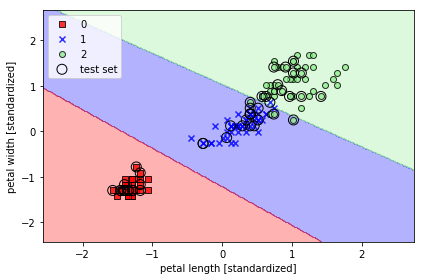

In [75]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

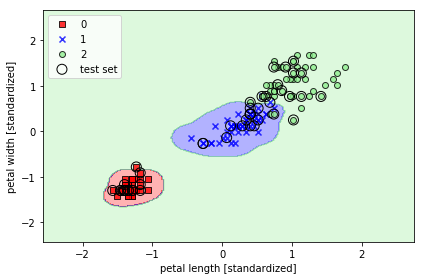

In [80]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm1, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

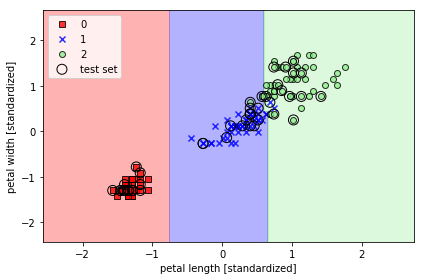

In [95]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

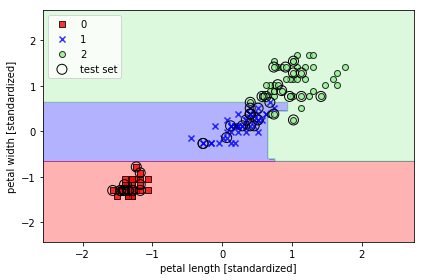

In [101]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

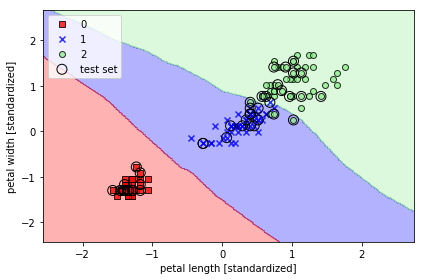

In [107]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

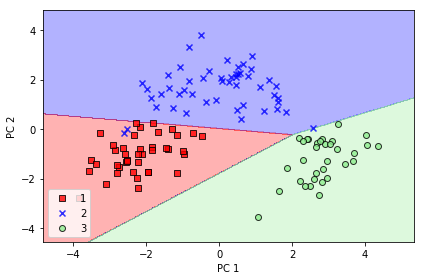

In [23]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

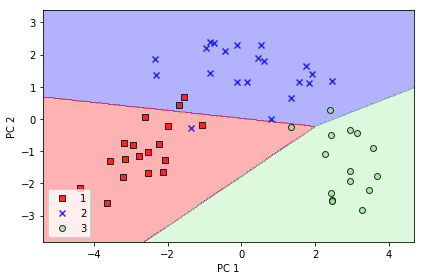

In [24]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

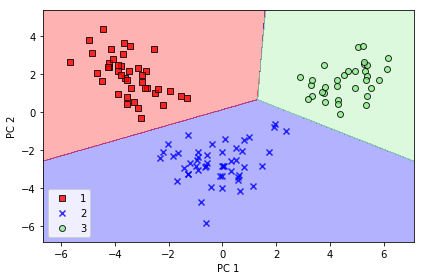

In [38]:
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

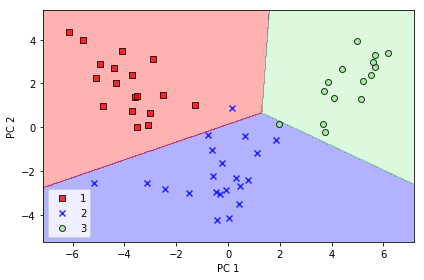

In [39]:
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()